In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v2.feature_column as fd
import pandas as pd

In [ ]:
x_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
x_test = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = x_train.pop('survived')
y_test = x_test.pop('survived')

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
x_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<Axes: >

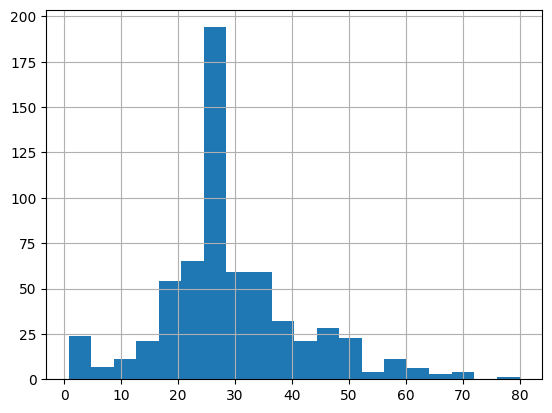

In [ ]:
x_train.age.hist(bins = 20)

<Axes: xlabel='sex'>

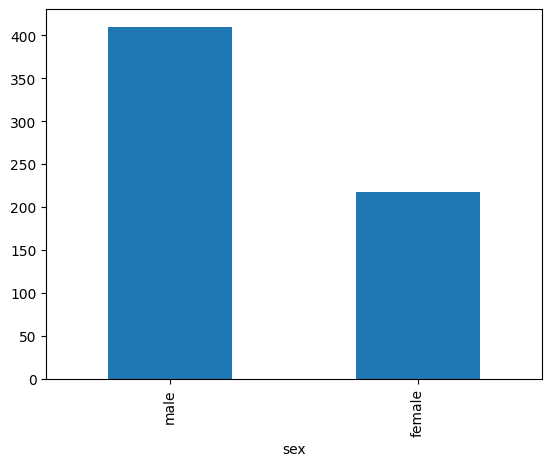

In [ ]:
x_train.sex.value_counts().plot(kind = 'bar')

<Axes: xlabel='class'>

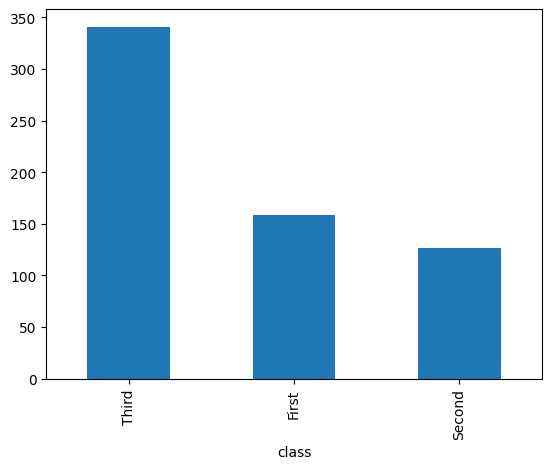

In [ ]:
x_train['class'].value_counts().plot(kind = 'bar')

<Axes: xlabel='sex'>

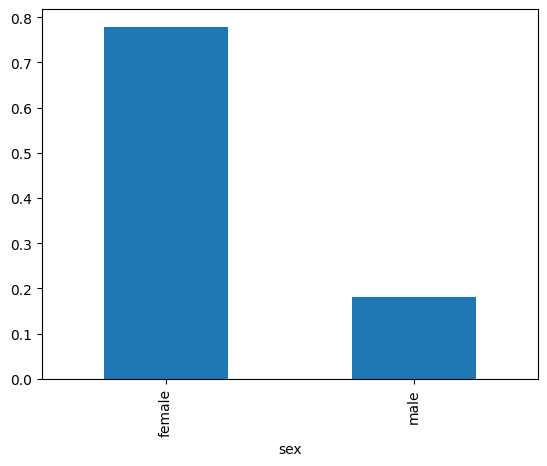

In [ ]:
pd.concat([x_train,y_train],axis = 1).groupby('sex').survived.mean().plot(kind = 'bar')

In [ ]:
x_train.columns

Index(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck',
       'embark_town', 'alone'],
      dtype='object')

In [ ]:
cat_cols = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck','embark_town', 'alone']
num_cols = ['age','fare']

feature_column = []

for feature_name in cat_cols:
  vocabulary = x_train[feature_name].unique()
  feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in num_cols:
  feature_column.append(tf.feature_column.numeric_column(feature_name,dtype = tf.float32))

feature_column

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [ ]:
def create_input_fn(data_df,label_df,num_epochs = 10,shuffle = True,batch_size = 32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

In [ ]:
train_input_fn = create_input_fn(x_train,y_train)
eval_input_fn = create_input_fn(x_test,y_test,1,shuffle = False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_column)

In [ ]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
result['accuracy']

0.7537879

In [ ]:
result

{'accuracy': 0.7537879,
 'accuracy_baseline': 0.625,
 'auc': 0.79363334,
 'auc_precision_recall': 0.73349935,
 'average_loss': 0.58201784,
 'label/mean': 0.375,
 'loss': 0.5726965,
 'precision': 0.75757575,
 'prediction/mean': 0.252605,
 'recall': 0.5050505,
 'global_step': 200}

In [ ]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

Instructions for updating:
Use `tf.keras.layers.experimental.preprocessing.HashedCrossing` instead for feature crossing when preprocessing data to train a Keras model.


In [ ]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_column+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

result

{'accuracy': 0.7537879,
 'accuracy_baseline': 0.625,
 'auc': 0.8375881,
 'auc_precision_recall': 0.76473886,
 'average_loss': 0.5101926,
 'label/mean': 0.375,
 'loss': 0.5054343,
 'precision': 0.6393443,
 'prediction/mean': 0.4560104,
 'recall': 0.7878788,
 'global_step': 200}